This notebook aims to build a graph purely with KNN.

In [2]:
import numpy as np
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-trainval', dataroot='/media/HDD2/Datasets/mini_nusc', verbose=True)

# nusc = NuScenes(version='v1.0-trainval', dataroot='/media/HDD2/Datasets/nuscenes2', verbose=True)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.591 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [3]:
import torch_geometric as tgeo

tgeo.get_home_dir()

'/home/maximilian/.cache/pyg'

In [4]:
from nuscenes.utils.splits import train,val
from nuscenes.utils.splits import create_splits_scenes

split = create_splits_scenes()
print(split.keys())
split_scene_list = []
for scene_name in split['mini_train']:
    for scene in nusc.scene:
        if scene['name']==scene_name:
            split_scene_list.append(scene)

dict_keys(['train', 'val', 'test', 'mini_train', 'mini_val', 'train_detect', 'train_track'])


In [5]:
print(split['mini_train'])
print(split['mini_val'])

['scene-0061', 'scene-0553', 'scene-0655', 'scene-0757', 'scene-0796', 'scene-1077', 'scene-1094', 'scene-1100']
['scene-0103', 'scene-0916']


{'token': 'fcbccedd61424f1b85dcbf8f897f9754', 'log_token': '53cf9c55dd8644bea67b9f009fc1ee38', 'nbr_samples': 40, 'first_sample_token': '3e8750f331d7499e9b5123e9eb70f2e2', 'last_sample_token': '281b92269fd648d4b52d06ac06ca6d65', 'name': 'scene-0103', 'description': 'Many peds right, wait for turning car, long bike rack left, cyclist'}


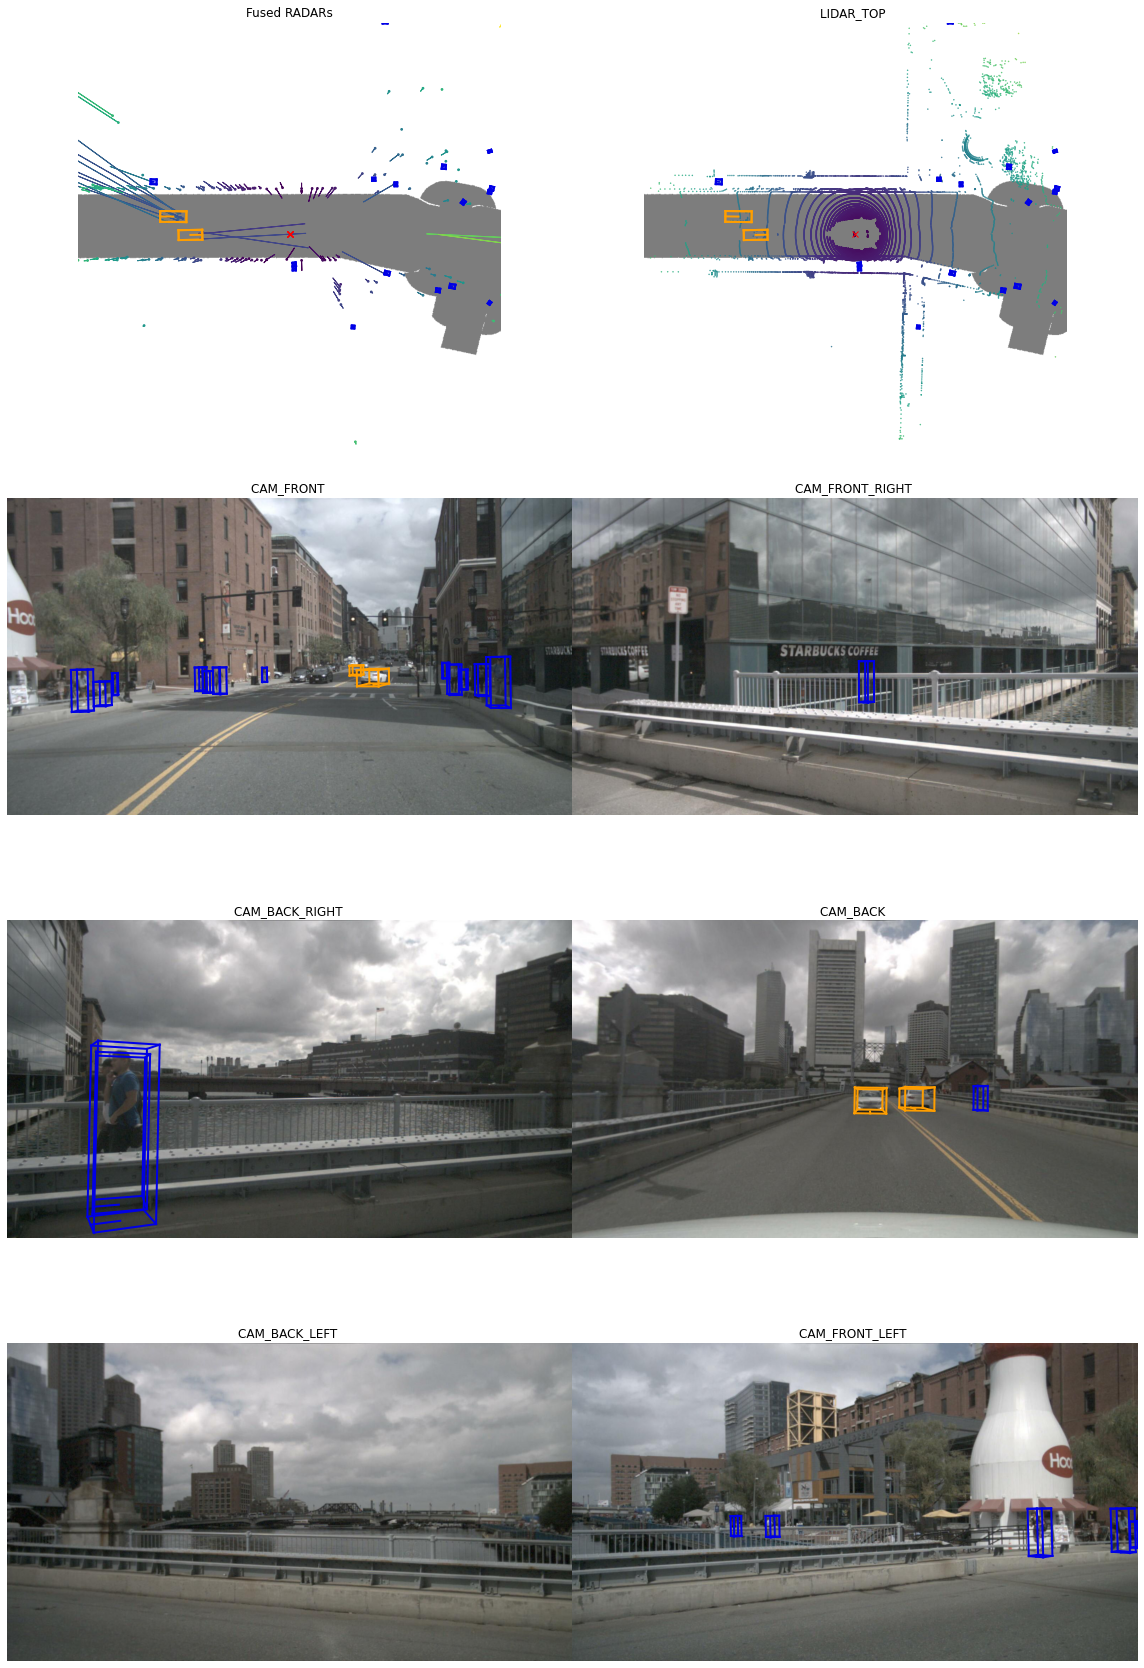

In [13]:
output_path = '/media/HDD2/students/maximilian/spatio-temporal-gnn/visualization/mini_nuscenes/'
scene_names = ['scene-0103'] 
# scene_names = ['scene-0916']

sequences_by_name = {
            scene["name"]: scene for scene in nusc.scene
        }
scene = sequences_by_name[scene_names[0]]
print(scene)
first_sample_token = scene['first_sample_token']
nusc.render_sample(first_sample_token)



# for scene_name in scene_names:
#     scene = sequences_by_name[scene_name]
#     # nusc.render_scene(scene['token'])


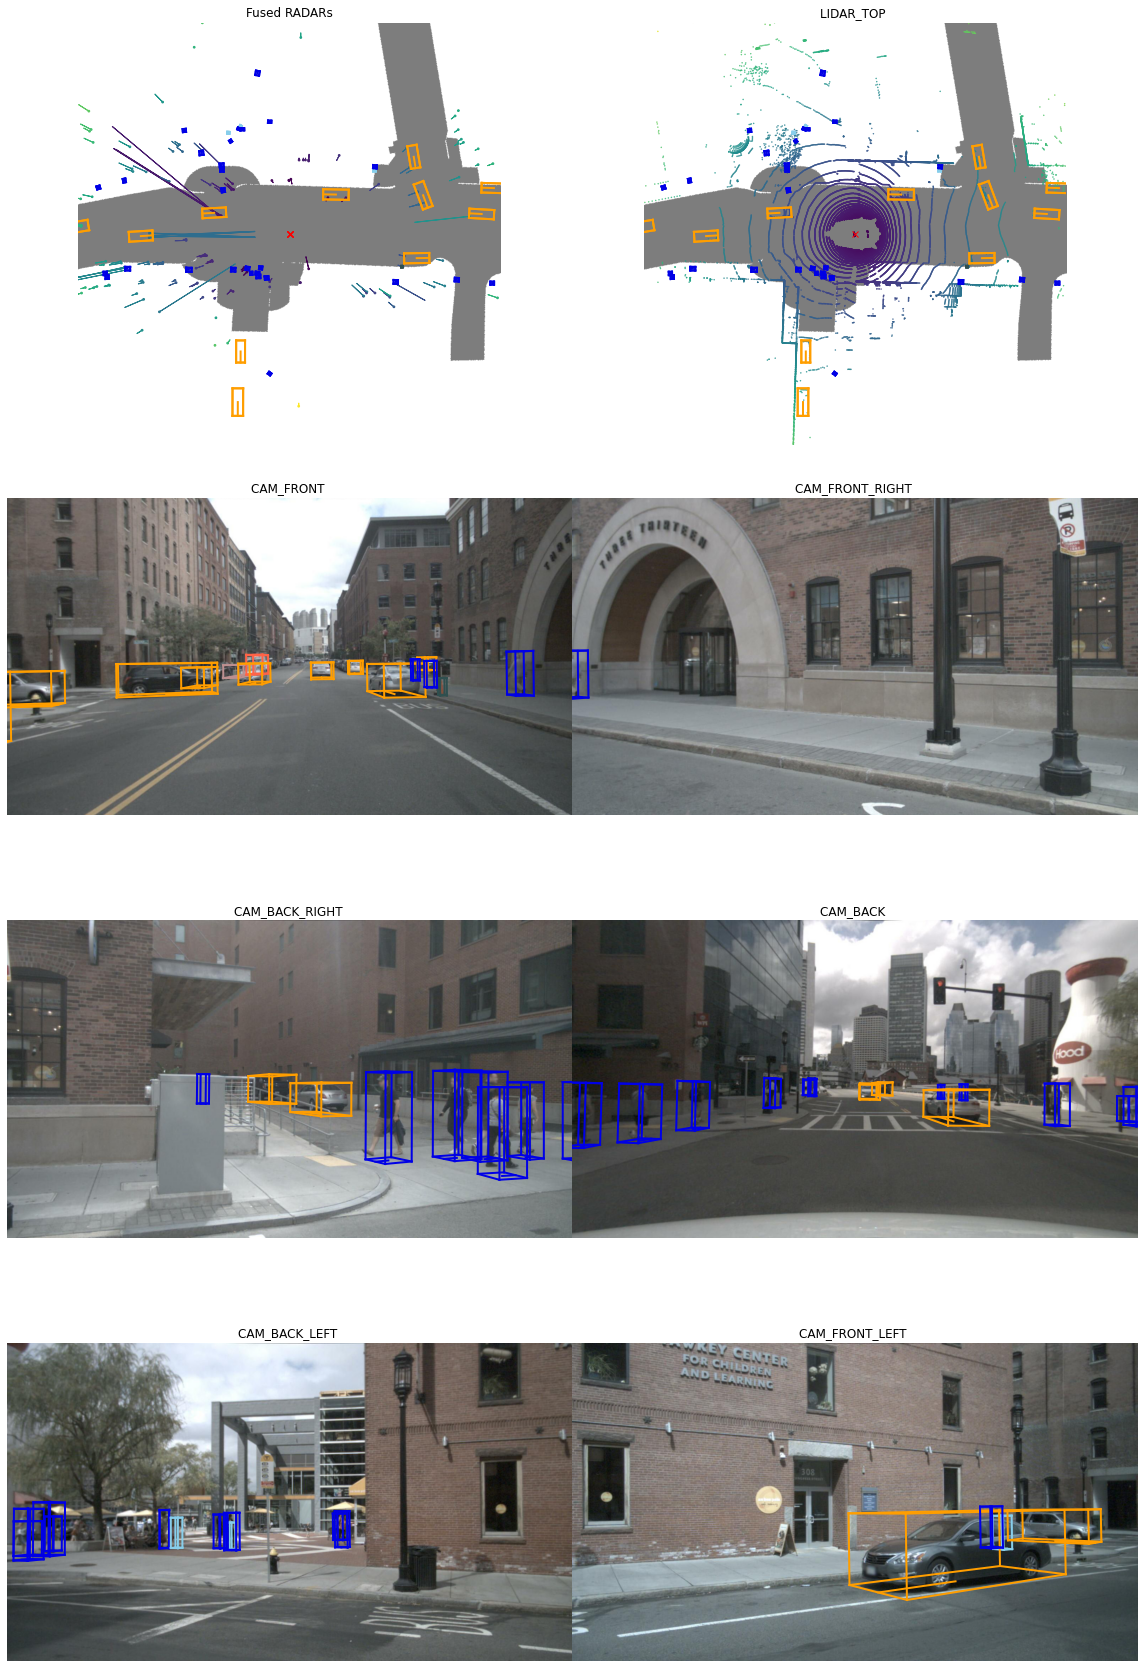

In [14]:
NUMBER_OF_SKIPPED_FRAMES = 10
for i in range(NUMBER_OF_SKIPPED_FRAMES):
    temp_sample = nusc.get('sample', first_sample_token)
    temp_token = temp_sample['next']
    first_sample_token = temp_token

nusc.render_sample(first_sample_token)